# Implement K-Means from Scratch using Python with Numpy
tip: press ctrl+`[` or `]` for indentation/de-indentation

In [3]:
#https://stackoverflow.com/questions/32612180/eliminating-warnings-from-scikit-learn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [5]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt

## generate a toy dataset for algorithm development

In [37]:
K=3
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])
# Generate random data and center it to the three centers
cluster_1 = np.random.randn(100, 2) + center_1
cluster_2 = np.random.randn(100,2) + center_2
cluster_3 = np.random.randn(100,2) + center_3
data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)

In [39]:
data.shape # 300 samples: each sample has two features (e.g., income, spend)

(300, 2)

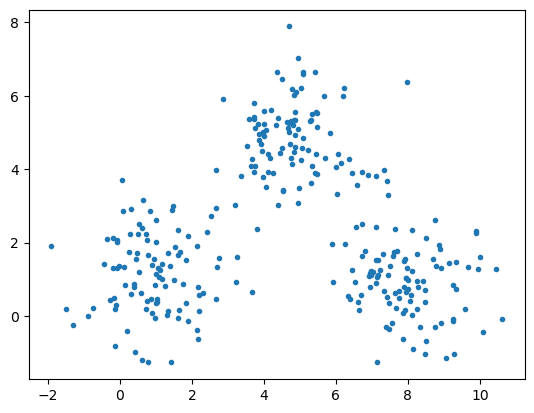

In [41]:
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], '.')

## apply the k-means algorithm in sk-learn

In [43]:
from sklearn.cluster import KMeans as sk_KMeans

In [45]:
sk_model=sk_KMeans(n_clusters=3)
sk_model.fit(data)
sk_label=sk_model.predict(data)

In [47]:
dir(sk_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_algorithm',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params_vs_input',
 '_check_test_data',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_features_out',
 '_n_init',
 '_n_threads',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_ht

In [49]:
sk_model.max_iter

300

In [51]:
sk_model.n_clusters

3

In [53]:
sk_centers=sk_model.cluster_centers_
sk_centers.shape

(3, 2)

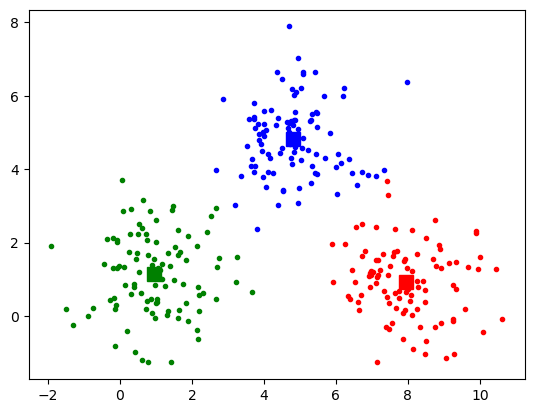

In [55]:
fig, ax = plt.subplots()
ax.plot(data[sk_label==0, 0], data[sk_label==0, 1], 'r.')
ax.plot(data[sk_label==1, 0], data[sk_label==1, 1], 'g.')
ax.plot(data[sk_label==2, 0], data[sk_label==2, 1], 'b.')
ax.plot(sk_centers[0,0], sk_centers[0,1], 'rs', markersize=10)
ax.plot(sk_centers[1,0], sk_centers[1,1], 'gs', markersize=10)
ax.plot(sk_centers[2,0], sk_centers[2,1], 'bs', markersize=10)

## Let's implement K-Means

In [58]:
class MyKMeans:    
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.labels_=None
        
    def initialize(self, X):
        pass
    
    def fit(self, X):
        #find the cluster centers of the data samples in X
        #each row of X is a sample (feature vector)
        pass
    
    def predict(self, X):
        #predict the cluster labels of the data samples in X
        #each row of X is a sample (feature vector)
        pass    

### initialization
use random numbers to initialize the cluster centers

In [69]:
centers_init=10*np.random.rand(K, 2)
centers_init

array([[0.36704227, 4.91008992],
       [4.02088705, 4.25034261],
       [9.81697813, 0.5191035 ]])

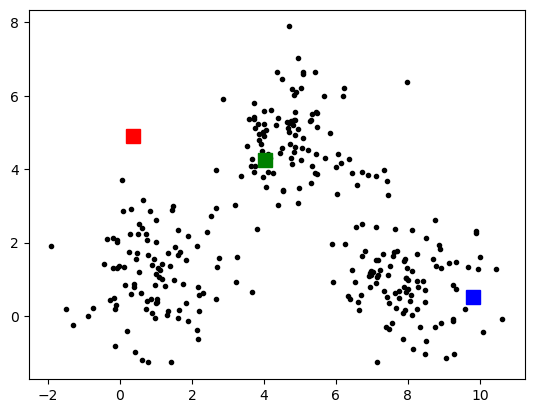

In [71]:
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], 'k.')
ax.plot(centers_init[0,0], centers_init[0,1], 'rs', markersize=10)
ax.plot(centers_init[1,0], centers_init[1,1], 'gs', markersize=10)
ax.plot(centers_init[2,0], centers_init[2,1], 'bs', markersize=10)

In [73]:
data.min(axis=0)

array([-1.91383013, -1.26903859])

In [75]:
data.shape

(300, 2)

In [87]:
#Better Initialization data points to start the KM Implementation
def K_Means_initialization(n_clusters, X, random_state):
    #find min and max of each feature in data X
    min_values=X.min(axis=0)
    max_values=X.max(axis=0)
    rng=np.random.RandomState(random_state)
    centers=rng.rand(n_clusters, X.shape[1])
    for k in range(0, X.shape[1]):
        centers[:,k]=min_values[k]+(max_values[k]-min_values[k])*centers[:,k]
    return centers

In [89]:
centers_init = K_Means_initialization(n_clusters=K, X=data, random_state=0)
centers_init

array([[4.96315229, 5.28054819],
       [5.63917851, 3.72091213],
       [3.39483408, 4.64595364]])

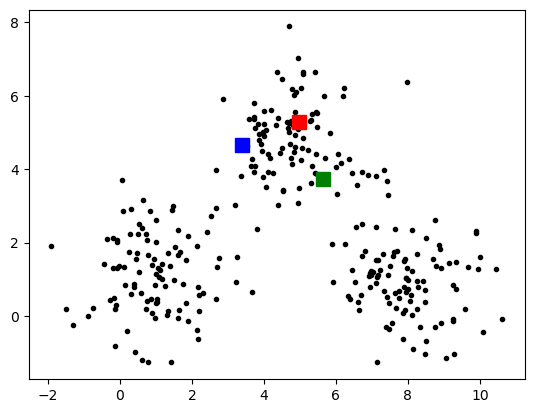

In [91]:
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], 'k.')
ax.plot(centers_init[0,0], centers_init[0,1], 'rs', markersize=10)
ax.plot(centers_init[1,0], centers_init[1,1], 'gs', markersize=10)
ax.plot(centers_init[2,0], centers_init[2,1], 'bs', markersize=10)

### two steps in one iteration of K-Means
### Step-1: given the cluster centers, for each sample, find the nearest center among the cluster centers
after step-1, every sample is assigned with a cluster label. By definition, the label of a sample is the index of the cluster  nearest to the sample.
### Step-2: given the cluster labels,  for each cluster, compute its center.
after step-2, the center of each cluster is updated.  By definition, the center of a cluster is the average of the samples in the cluster.

In [117]:
#step-1:
#given the cluster centers
Centers=centers_init
Centers

array([[4.96315229, 5.28054819],
       [5.63917851, 3.72091213],
       [3.39483408, 4.64595364]])

In [119]:
Centers.shape

(3, 2)

In [121]:
data.shape

(300, 2)

In [99]:
#step-1: for each sample, find the nearest center among the cluster centers
#slow-version
label_list=[]
for n in range(0, data.shape[0]):
    sample_n=data[n]
    dist_list=[]
    for k in range(0, Centers.shape[0]):
        center_k=Centers[k]
        dist_k=0
        for i in range(0, 2):
            dist_k=dist_k+(sample_n[i]-center_k[i])**2 #Euclidean
        dist_k=np.sqrt(dist_k) #Square root Euclidean
        dist_list.append(dist_k) #Append list of distances
    idx_min=np.argmin(dist_list) #Find min distance
    label_list.append(idx_min) #Adds index on nearest center
label_list[0:10]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [101]:
#step-1: for each sample, find the nearest center among the cluster centers
#faster version
label_list=[]
for n in range(0, data.shape[0]):
    sample_n=data[n].reshape(1,-1) #Convert data in 2D array, correct dimensionality. Reshape sample to mantain correct dimensionality.
    dist_list=np.sqrt(((sample_n-Centers)**2).sum(axis=1)) #Euclidean distance
    idx_min=np.argmin(dist_list) # Find minimun distance
    label_list.append(idx_min) #Adds index of nearest center to label list  
label_list[0:10]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [103]:
def find_the_nearest_center(X, cluster_centers): #Define function with two parameters
    label_list=np.zeros(X.shape[0]) #Create numpy array of zeros with equal lenght of data as number of samples
    for n in range(0, X.shape[0]): #Loop through each sample of data
        sample_n=X[n:n+1] #Extract in 2D Array
        dist_list=np.sqrt(((sample_n-cluster_centers)**2).sum(axis=1))  #Euclidean distance between current and samplers
        label_list[n]=np.argmin(dist_list)  # Assign index of nearest center (min distance) to nth position.  
    return label_list

In [105]:
labels=find_the_nearest_center(X=data, cluster_centers=Centers) #Assing cluster labels to data points
labels[0:10]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [107]:
labels.shape

(300,)

In [109]:
#Step-2: given the cluster labels, for each cluster, compute its center.
#slow
# Update Cluster Centers
Centers=np.zeros((K, 2)) # 2D array of zeros and 2 columns
for k in range(0, K): # Loops through each cluster
    center_k=np.zeros(2) # Temporary array to accumulate sum of points in cluster k
    num_samples_k=0 # Number of points in cluster K
    for n in range(0, data.shape[0]): # Nested loop goes through each data and if it belongs adds point to the sum
        if labels[n] == k:
            center_k=center_k+data[n] # Adds point to the sum
            num_samples_k+=1
    center_k=center_k/num_samples_k # Average
    Centers[k]=center_k # Updates centers
Centers  

array([[5.02116095, 5.53540928],
       [7.43362986, 1.48885143],
       [1.5586063 , 1.93322007]])

In [111]:
#Step-2: given the cluster labels, for each cluster, compute its center.
#faster
for k in range(0, K): #Loop through each cluster
    Centers[k]=data[labels==k].mean(axis=0) #labels==k: create boolean mask, true are data opints assigned to cluster k, data: select data, mean: calculate new center
Centers    

array([[5.02116095, 5.53540928],
       [7.43362986, 1.48885143],
       [1.5586063 , 1.93322007]])

In [113]:
def computer_center(n_clusters, X, labels): # n_cluster: clusters, X: Data, Labels: Grouped
    Centers=np.zeros((n_clusters, X.shape[1])) # 2D Array of zeros
    for k in range(0, n_clusters):
        Centers[k]=X[labels==k].mean(axis=0) # X labels==k, creates a boolean mask for points in cluster K from data X and get the mean after assign
    return Centers

In [115]:
computer_center(n_clusters=K, X=data, labels=labels)

array([[5.02116095, 5.53540928],
       [7.43362986, 1.48885143],
       [1.5586063 , 1.93322007]])

### Lets combine all the code

In [33]:
def K_Means_initialization(n_clusters, X, random_state):
    #find min and max of each feature in data X
    min_values=X.min(axis=0)
    max_values=X.max(axis=0)
    rng=np.random.RandomState(random_state) # Create random number generator with random_state reproductivity
    centers=rng.rand(n_clusters, X.shape[1]) # Generate a matrix of random values between 0 and 1, with dimension n cluster x number of features
    for k in range(0, X.shape[1]):
        centers[:,k]=min_values[k]+(max_values[k]-min_values[k])*centers[:,k] # Scale random values to the range of features in data set 
    return centers

In [34]:
def find_the_nearest_center(X, cluster_centers):
    label_list=np.zeros(X.shape[0]) #Create list of zeros
    for n in range(0, X.shape[0]):
        sample_n=X[n:n+1] # Create 2D Matrix to keep format
        dist_list=np.sqrt(((sample_n-cluster_centers)**2).sum(axis=1)) #Calculate Euclidean distance
        label_list[n]=np.argmin(dist_list) #Assign index of nearest center (Min distance) to nth position of list from 0 to 5 to data point
    return label_list

In [35]:
def computer_center(n_clusters, X, labels):
    Centers=np.zeros((n_clusters, X.shape[1])) #2D Array with n_clusters and X number of features
    for k in range(0, n_clusters):
        Centers[k]=X[labels==k].mean(axis=0) # Boolean mask to each data point and then calculate average of center
    return Centers

In [36]:
class MyKMeans:    
    def __init__(self, n_clusters, max_iter=300, random_state=0): #Initialize variables 
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.labels_=None
        self.random_state=random_state
            
    def initialize(self, X):
        self.cluster_centers_ = K_Means_initialization(self.n_clusters, X, self.random_state) #Set initial clusters
    
    def fit(self, X):
        #find the cluster centers of the data samples in X
        #each row of X is a sample (feature vector)
        self.initialize(X)
        for n in range(0, self.max_iter):
            self.labels_=find_the_nearest_center(X, self.cluster_centers_) #Assign points to nearest centers   #Update Labels
            self.cluster_centers_ = computer_center(self.n_clusters, X, self.labels_) #Update cluster centers  #Update Centers
    
    def predict(self, X):
        #predict the cluster labels of the data samples in X
        #each row of X is a sample (feature vector)
        labels=find_the_nearest_center(X, self.cluster_centers_) #Assing new data points to nearest clusters 
        return labels

###  apply MyKMeans

In [37]:
my_model=MyKMeans(n_clusters=3)
my_model.fit(data)
my_label=my_model.predict(data)

In [38]:
my_centers=my_model.cluster_centers_
my_centers.shape

(3, 2)

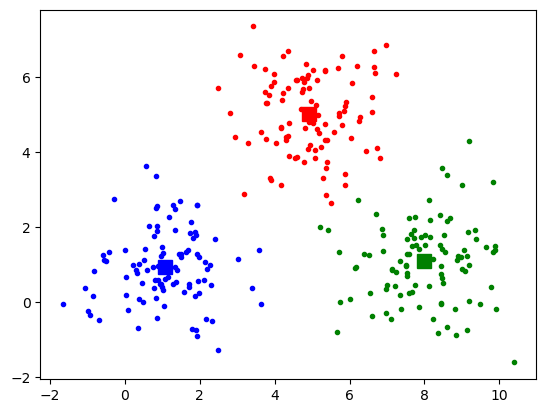

In [39]:
fig, ax = plt.subplots()
ax.plot(data[my_label==0, 0], data[my_label==0, 1], 'r.')
ax.plot(data[my_label==1, 0], data[my_label==1, 1], 'g.')
ax.plot(data[my_label==2, 0], data[my_label==2, 1], 'b.')
ax.plot(my_centers[0,0], my_centers[0,1], 'rs', markersize=10)
ax.plot(my_centers[1,0], my_centers[1,1], 'gs', markersize=10)
ax.plot(my_centers[2,0], my_centers[2,1], 'bs', markersize=10)

### Save MyKMeans to a .py file

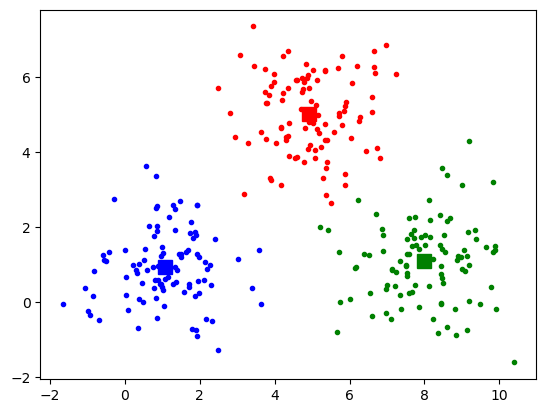

In [40]:
from MyKmeans import MyKMeans

my_model=MyKMeans(n_clusters=3)
my_model.fit(data)
my_label=my_model.predict(data)
my_centers=my_model.cluster_centers_
fig, ax = plt.subplots()
ax.plot(data[my_label==0, 0], data[my_label==0, 1], 'r.')
ax.plot(data[my_label==1, 0], data[my_label==1, 1], 'g.')
ax.plot(data[my_label==2, 0], data[my_label==2, 1], 'b.')
ax.plot(my_centers[0,0], my_centers[0,1], 'rs', markersize=10)
ax.plot(my_centers[1,0], my_centers[1,1], 'gs', markersize=10)
ax.plot(my_centers[2,0], my_centers[2,1], 'bs', markersize=10)

### Show the steps with plots

In [41]:
K=3
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])
# Generate random data and center it to the three centers
sigma=1.5
cluster_1 = sigma*np.random.randn(100, 2) + center_1
cluster_2 = sigma*np.random.randn(100,2) + center_2
cluster_3 = sigma*np.random.randn(100,2) + center_3
data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)

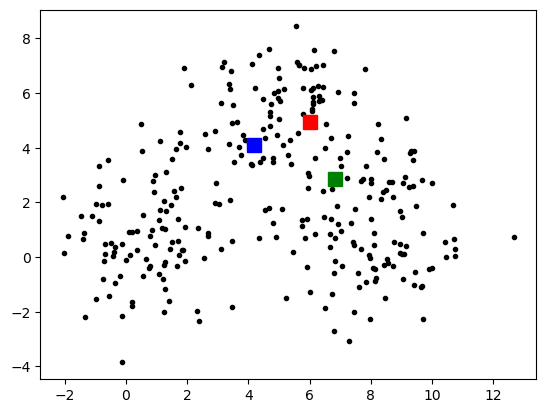

In [43]:
cluster_centers = K_Means_initialization(3, data, 0)
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], 'k.')
ax.plot(cluster_centers[0,0], cluster_centers[0,1], 'rs', markersize=10)
ax.plot(cluster_centers[1,0], cluster_centers[1,1], 'gs', markersize=10)
ax.plot(cluster_centers[2,0], cluster_centers[2,1], 'bs', markersize=10)

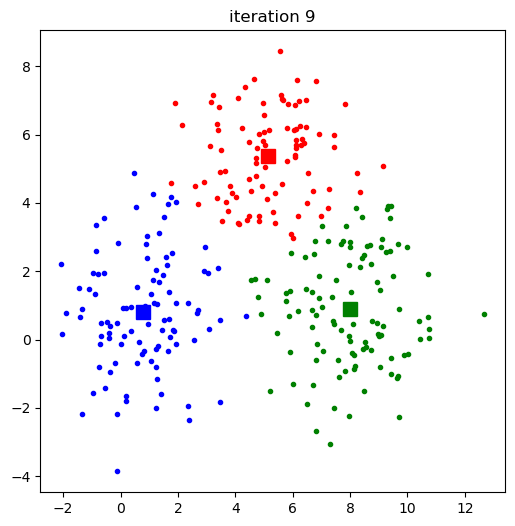

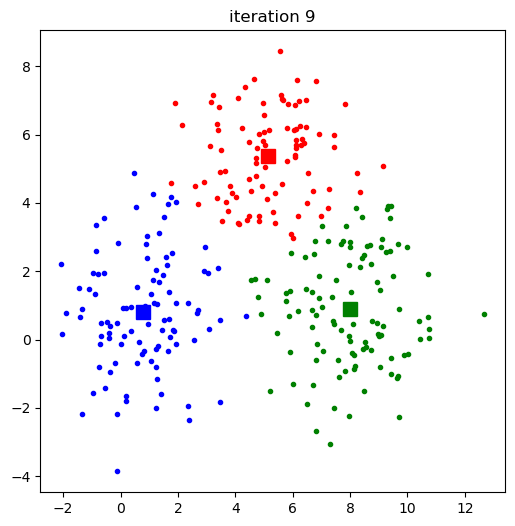

In [44]:
for n in range(0, 10):
    labels=find_the_nearest_center(data,  cluster_centers)
    cluster_centers = computer_center(3, data, labels)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(data[labels==0, 0], data[labels==0, 1], 'r.')
    ax.plot(data[labels==1, 0], data[labels==1, 1], 'g.')
    ax.plot(data[labels==2, 0], data[labels==2, 1], 'b.')
    ax.plot(cluster_centers[0,0], cluster_centers[0,1], 'rs', markersize=10)
    ax.plot(cluster_centers[1,0], cluster_centers[1,1], 'gs', markersize=10)
    ax.plot(cluster_centers[2,0], cluster_centers[2,1], 'bs', markersize=10)
    ax.set_title('iteration '+str(n))
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(2)    